# COVID-19: A Pandemic in Review

This project will look into COVID-19 case numbers in the United States using a dataset created by the Johns Hopkins University CSSE Team (https://github.com/CSSEGISandData/COVID-19). At the time of this project, it's been about 2 years since the pandemic started and we will try to find different trends in the data through visualizations. We will also be trying to answer the following questions:

- Which states have the most and least cases? Which states have the highest and lowest proportion of infected people?
- How similar or different were case numbers in the years 2020 and 2021?
- Are there any patterns or trends we can identify in daily case numbers? 
- Do holidays tend to lead to large waves of cases?
- Do states with higher vaccination rates have less cases?
- Does political party have any connection with Covid-19 case rates or death rates?

We will begin by reading in the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objects as go
import plotly.express as px
plt.style.use('seaborn-white')
plt.rcParams["figure.figsize"]=15,5
plt.rcParams.update({'font.size':14})

df = pd.read_csv('covid_data.csv')
df.head()

UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 1/7/22  1/8/22  1/9/22  1/10/22  1/11/22  \
0  32.539527 -86.644082  ...  11789   11856   11975    12029    12102   
1  30.727750 -87.722071  ...  42391   42738   43285    43583    43896   
2  31.868263 -85.387129  ...   4150    4180    4263     4305     4375   
3  32.996421 -87.125115  ...   4815    4857    4914     4939     5007   
4  33.982109 -86.567906  ...  11690   11749   11828    11893    11965   

   1/12/22  1/13/22  1/14/22  1/15/22  1/16/22  
0    12180    12180    12180    12180    12624  
1    44353    44353    44353    44353    46528  
2     4437     4437     4437     4437     4684  
3     5046     5046     5046     5046     5274  
4    12068    12068    12068    12068    12520  

[5 rows x 737 columns]

## Cleaning the Data

We can see that daily numbers are provided on a county level for each state. Most of the columns have information we don't need, so we will drop them. Then we will look at the case numbers on a state level.

In [2]:
dropped_columns = ['UID', 'iso2', 'iso3', 'code3',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key']
df = df.drop(dropped_columns, axis = 1)
df.head()
                   

FIPS   Admin2 Province_State  1/22/20  1/23/20  1/24/20  1/25/20  \
0  1001.0  Autauga        Alabama        0        0        0        0   
1  1003.0  Baldwin        Alabama        0        0        0        0   
2  1005.0  Barbour        Alabama        0        0        0        0   
3  1007.0     Bibb        Alabama        0        0        0        0   
4  1009.0   Blount        Alabama        0        0        0        0   

   1/26/20  1/27/20  1/28/20  ...  1/7/22  1/8/22  1/9/22  1/10/22  1/11/22  \
0        0        0        0  ...   11789   11856   11975    12029    12102   
1        0        0        0  ...   42391   42738   43285    43583    43896   
2        0        0        0  ...    4150    4180    4263     4305     4375   
3        0        0        0  ...    4815    4857    4914     4939     5007   
4        0        0        0  ...   11690   11749   11828    11893    11965   

   1/12/22  1/13/22  1/14/22  1/15/22  1/16/22  
0    12180    12180    12180    12180    12624  
1    44353    44353    44353    44353    46528  
2     4437     4437     4437     4437     4684  
3     5046     5046     5046     5046     5274  
4    12068    12068    12068    12068    12520  

[5 rows x 729 columns]

In [3]:
#group by state
covid_states = df.groupby('Province_State').agg(np.sum)
covid_states.reset_index(inplace = True)
covid_states = covid_states.drop([2,9,13,14,39,44,52]).drop('FIPS', axis = 1)
covid_states.reset_index(drop = True, inplace = True)
covid_states.head(10)

Province_State  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0               Alabama        0        0        0        0        0        0   
1                Alaska        0        0        0        0        0        0   
2               Arizona        0        0        0        0        1        1   
3              Arkansas        0        0        0        0        0        0   
4            California        0        0        0        0        2        2   
5              Colorado        0        0        0        0        0        0   
6           Connecticut        0        0        0        0        0        0   
7              Delaware        0        0        0        0        0        0   
8  District of Columbia        0        0        0        0        0        0   
9               Florida        0        0        0        0        0        0   

   1/28/20  1/29/20  1/30/20  ...   1/7/22   1/8/22   1/9/22  1/10/22  \
0        0        0        0  ...   957848   966180   978632   984882   
1        0        0        0  ...   165353   165353   165353   168618   
2        1        1        1  ...  1445129  1461633  1477483  1491420   
3        0        0        0  ...   604843   613014   613014   622069   
4        2        2        2  ...  6024606  6060550  6256322  6383610   
5        0        0        0  ...   989409   989409   989409  1040510   
6        0        0        0  ...   573711   573711   573711   605116   
7        0        0        0  ...   198507   202236   205640   208340   
8        0        0        0  ...   108112   110040   110040   116278   
9        0        0        0  ...  4606489  4633077  4633077  4759073   

   1/11/22  1/12/22  1/13/22  1/14/22  1/15/22  1/16/22  
0   993418  1004622  1004622  1004622  1004622  1056478  
1   168618   173139   173139   178618   178618   178618  
2  1505580  1524363  1542936  1563193  1563193  1567192  
3   629825   640799   653789   664194   675790   681176  
4  6527242  6632985  6720235  6836637  6871649  6924718  
5  1062568  1075115  1089494  1103698  1103720  1103720  
6   611867   619185   628789   637572   637572   637572  
7   210437   213993   218486   221811   225094   227594  
8   117586   118802   120327   121871   121871   121871  
9  4806782  4878524  4933518  4992579  5041918  5041918  

[10 rows x 727 columns]

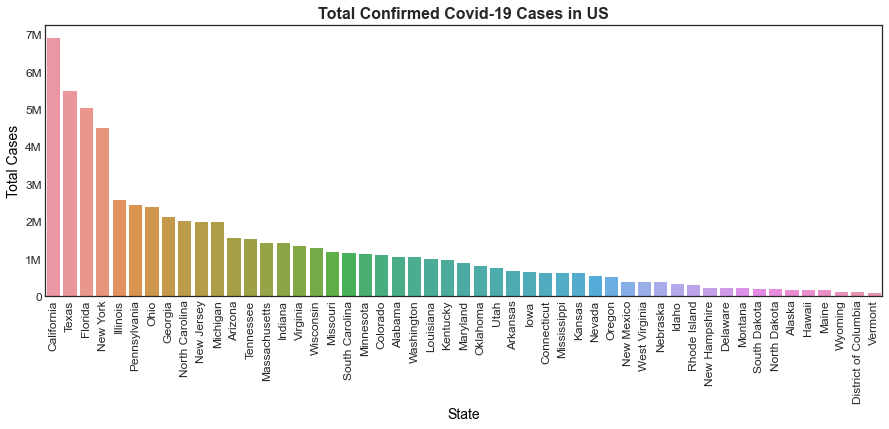

In [4]:
#create table for total cases and rename columns
total = covid_states.loc[:,['Province_State','1/16/22']]
total = total.rename(columns={'1/16/22': 'Total Confirmed Cases'})
total = total.sort_values(by='Total Confirmed Cases', ascending = False)

#create barplot and tick labels
sns.barplot(x='Province_State', y='Total Confirmed Cases', data=total)
tickposition = [0,1000000,2000000,3000000,4000000, 5000000, 6000000, 7000000]
ticklabels = ['0', '1M', '2M', '3M', '4M', '5M', '6M', '7M']
plt.yticks(tickposition,ticklabels, fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12) 
plt.title('Total Confirmed Covid-19 Cases in US',
          fontsize = 16, 
          fontweight = 'bold')
plt.xlabel('State', color = 'black', fontsize = 14)
plt.ylabel('Total Cases', color = 'black', fontsize = 14)
plt.show()

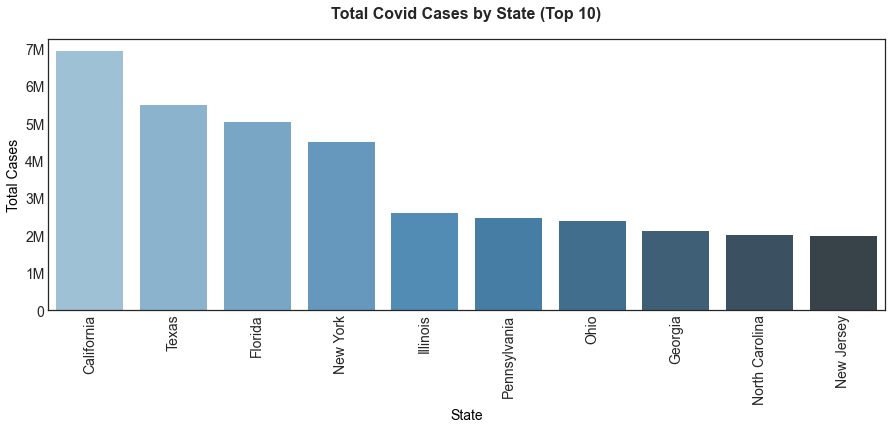

In [5]:
#create table for top 10 by case number
sns.barplot(x='Province_State', y='Total Confirmed Cases', data=total.iloc[0:10], palette='Blues_d')
plt.title('Total Covid Cases by State (Top 10)', 
          fontsize = 16, 
          fontweight = 'bold',  
          pad = 20)
plt.xlabel('State', color = 'black', fontsize = 14)
plt.ylabel('Total Cases', color = 'black', fontsize = 14)
plt.xticks(rotation = 90) 

# add tick positions and labels 
tickposition = [0,1000000,2000000,3000000,4000000, 5000000, 6000000, 7000000]
ticklabels = ['0', '1M', '2M', '3M', '4M', '5M', '6M', '7M']
plt.yticks(tickposition,ticklabels, fontsize = 14)
plt.xticks(fontsize = 14)
plt.show()

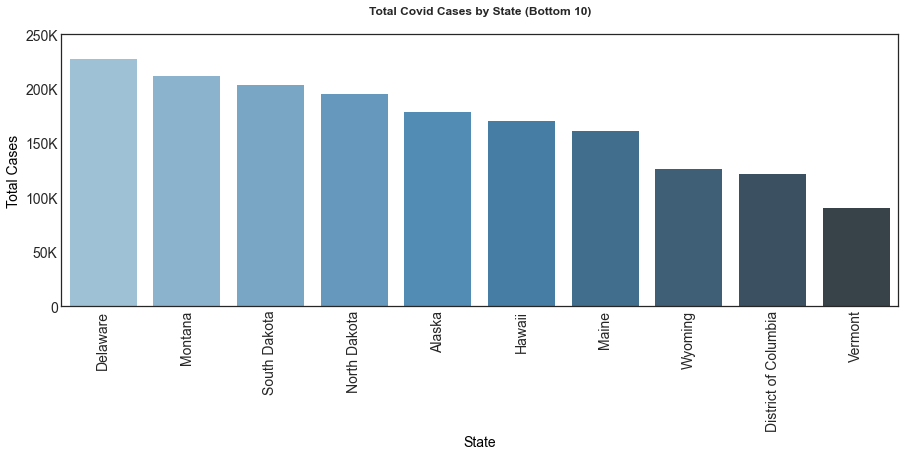

In [6]:
#create table for bottom 10 by case number
sns.barplot(x='Province_State', y='Total Confirmed Cases', data=total.iloc[-10:], palette='Blues_d')
plt.title('Total Covid Cases by State (Bottom 10)', 
          fontsize = 12, 
          fontweight = 'bold',  
          pad = 20)
plt.xlabel('State', color = 'black', fontsize = 14)
plt.ylabel('Total Cases', color = 'black', fontsize = 14)
plt.xticks(rotation = 90) 

# add tick positions and labels 
tickposition = [0,50000,100000,150000,200000, 250000]
ticklabels = ['0', '50K', '100K', '150K', '200K', '250K']
plt.yticks(tickposition,ticklabels, fontsize = 14)
plt.xticks(fontsize=14)

plt.show()

In [7]:
#create a column for the state ranking by total cases
total['Cases Ranking'] = range(1,len(total) + 1)
total.head()

Province_State  Total Confirmed Cases  Cases Ranking
4      California                6924718              1
43          Texas                5500276              2
9         Florida                5041918              3
32       New York                4507714              4
13       Illinois                2589640              5

## State Total Infection Proportion 

Raw case numbers do not tell the full story, so we will look at the percentage of people who got Covid-19 in each state. While we would possibly have to consider that some people got Covid-19 twice, we can also factor in at-home tests and people who got Covid but did not get tested. We will read in a dataset with the populations of each state, merge it with our current slice and then create a variable for the proportion of people infected in each state.

In [8]:
#read in dataset and merge with total table
pop = pd.read_csv('uspopulation.csv')
total = total.sort_values('Province_State')
total_cases = total.merge(pop, how='left', on='Province_State')

#calculate proportion infected
total_cases['Proportion Infected'] = total_cases['Total Confirmed Cases'] / total_cases['Population'] 
total_cases = total_cases.sort_values('Proportion Infected', ascending = False)
total_cases.head()

Province_State  Total Confirmed Cases  Cases Ranking  Population  \
39   Rhode Island                 302109             40     1059361   
34   North Dakota                 195545             45      762062   
1          Alaska                 178618             46      731545   
9         Florida                5041918              3    21477737   
44           Utah                 750334             28     3205958   

    Proportion Infected  
39             0.285180  
34             0.256600  
1              0.244165  
9              0.234751  
44             0.234044

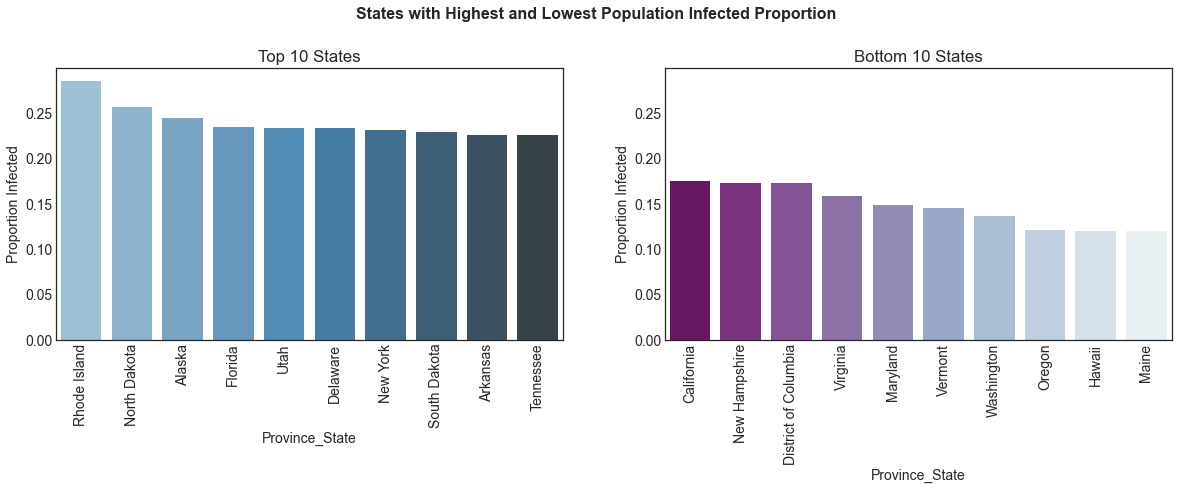

In [9]:
fig, axes = plt.subplots(1,2, figsize = (20,5), sharey=True)
fig.suptitle('States with Highest and Lowest Population Infected Proportion', 
          fontsize = 16,
             fontweight = 'bold', 
            y = 1.05)

#graph 1
sns.barplot(x='Province_State', y='Proportion Infected', data=total_cases.head(10), ax=axes[0], palette='Blues_d')
axes[0].set_title('Top 10 States')
axes[0].tick_params(axis='x', rotation=90)
#graph 2
sns.barplot(x='Province_State', y='Proportion Infected', data=total_cases.tail(10), ax=axes[1], palette='BuPu_r')
axes[1].set_title('Bottom 10 States')
axes[1].tick_params(axis='x', rotation=90)
axes[1].yaxis.set_tick_params(labelbottom=True)

It is interesting to see the difference between which states have the highest proportion of infected people. California, which is 1st in total cases, is 41st in overall proportion infected. Rhode Island, which is 40th in total cases, is 1st in proportion infected. Maine is last in proportion infected. We will compare the rankings of the states based on total cases and proportion. 

In [10]:
#create proportion ranking column
total_cases['Proportion Ranking'] = range(1,52)
columns = ['Province_State', 'Total Confirmed Cases', 'Proportion Infected', 'Cases Ranking','Proportion Ranking']
total_cases[columns].head(10)

Province_State  Total Confirmed Cases  Proportion Infected  Cases Ranking  \
39   Rhode Island                 302109             0.285180             40   
34   North Dakota                 195545             0.256600             45   
1          Alaska                 178618             0.244165             46   
9         Florida                5041918             0.234751              3   
44           Utah                 750334             0.234044             28   
7        Delaware                 227594             0.233726             42   
32       New York                4507714             0.231717              4   
41   South Dakota                 203137             0.229622             44   
3        Arkansas                 681176             0.225719             29   
42      Tennessee                1540515             0.225579             13   

    Proportion Ranking  
39                   1  
34                   2  
1                    3  
9                    4  
44                   5  
7                    6  
32                   7  
41                   8  
3                    9  
42                  10

In [11]:
total_cases[columns].sort_values('Cases Ranking').head(10)

Province_State  Total Confirmed Cases  Proportion Infected  Cases Ranking  \
4       California                6924718             0.175255              1   
43           Texas                5500276             0.189692              2   
9          Florida                5041918             0.234751              3   
32        New York                4507714             0.231717              4   
13        Illinois                2589640             0.204362              5   
38    Pennsylvania                2458722             0.192058              6   
35            Ohio                2384107             0.203960              7   
10         Georgia                2113319             0.199043              8   
33  North Carolina                2011302             0.191770              9   
30      New Jersey                1994502             0.224551             10   

    Proportion Ranking  
4                   42  
43                  39  
9                    4  
32                   7  
13                  26  
38                  34  
35                  27  
10                  29  
33                  35  
30                  11

It is interesting to see the differences between states that are highest in COVID-19 cases overall and relative to state population. Rhode Island , North Dakota and Alaska are the 3 worst in terms of proportion but 40th, 45th and 46th in terms of total cases, respectively. California, which is 1st in total cases, is only 42nd in terms of overall proportion. Besides Florida and New York, the two states talked about most in the media, none of the states in the top 10 for case ranking are in the top 10 for proportion ranking. For people to truly understand the situation in their states, they need to make sure they look at variables with relative scopes. 

Next, we will make bar charts comparing the total cases and proportion infected of the states that are top 10 in total cases and top 10 in total proportion infected. 

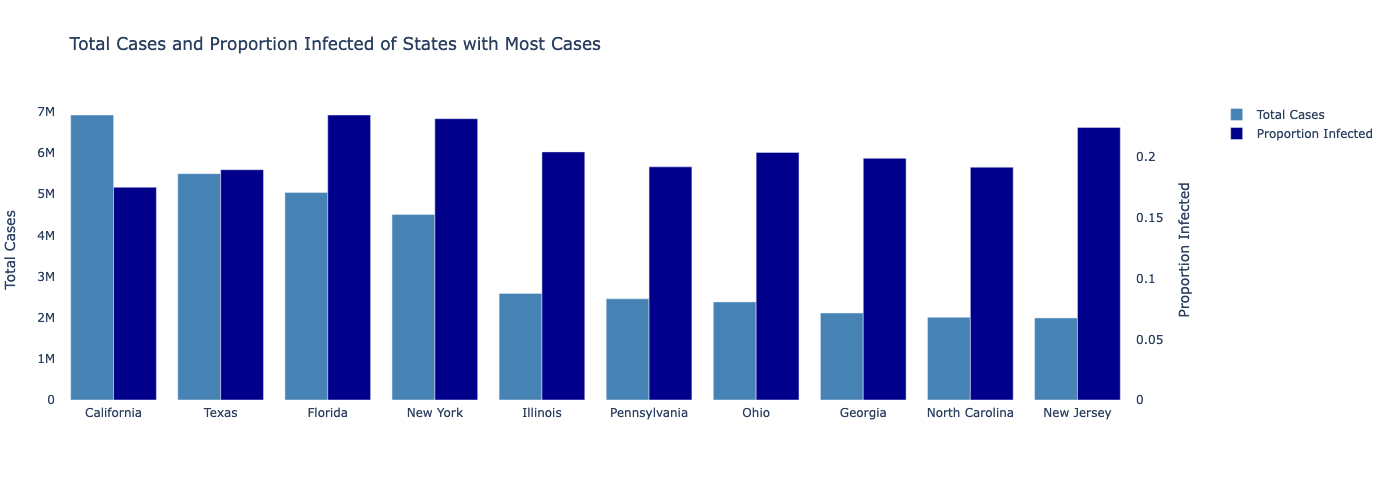

In [12]:
#make dataframes for each bar chart
df1 = total_cases.head(10)
df2 = total_cases.sort_values('Cases Ranking').head(10)

fig = go.Figure(
    data=[
        go.Bar(name='Total Cases', x=df2['Province_State'], y=df2['Total Confirmed Cases'], yaxis='y', offsetgroup=1, marker_color='steelblue'),
        go.Bar(name='Proportion Infected', x=df2['Province_State'], y = df2['Proportion Infected'], yaxis='y2', offsetgroup=2, marker_color='darkblue')
    ],
    layout={
        'yaxis': {'title': 'Total Cases'},
        'yaxis2': {'title': 'Proportion Infected', 'overlaying': 'y', 'side': 'right'}
    }
)

# Change the bar mode
fig.update_layout(barmode='group',
                  legend=dict(yanchor="top",y=1,xanchor="left",x=1.08))
fig.update_layout(
    title = 'Total Cases and Proportion Infected of States with Most Cases',
    autosize=False,
    width=1250,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="White",
    plot_bgcolor='White'
)
fig.show()

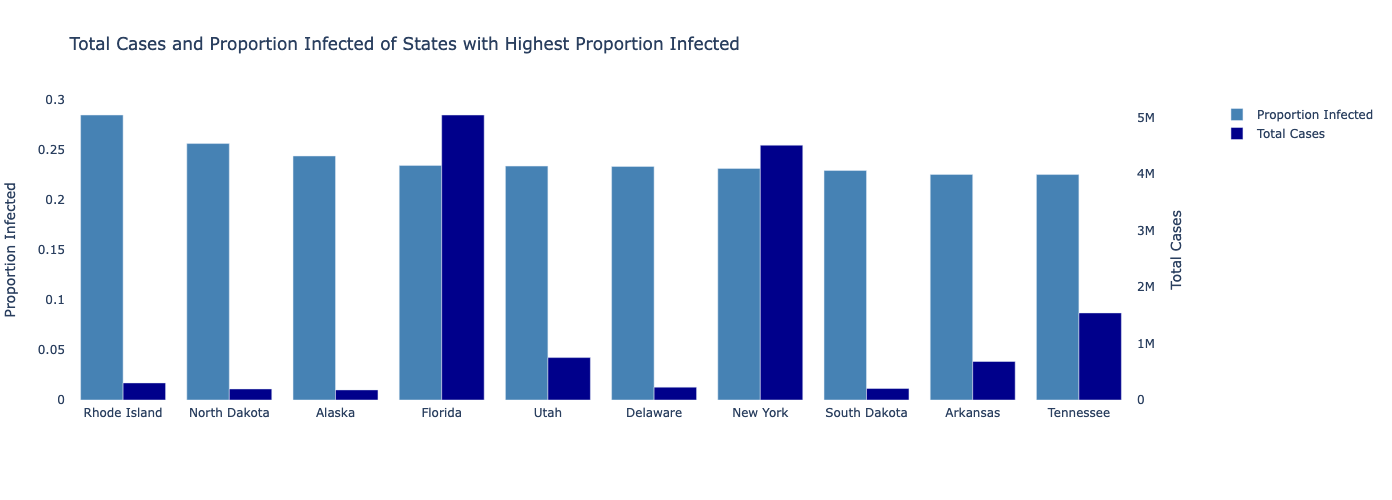

In [13]:
fig = go.Figure(
    data=[
        go.Bar(name='Proportion Infected', x=df1['Province_State'], y=df1['Proportion Infected'], yaxis='y', offsetgroup=1, marker_color='steelblue'),
        go.Bar(name='Total Cases', x=df1['Province_State'], y = df1['Total Confirmed Cases'], yaxis='y2', offsetgroup=2, marker_color='darkblue')
    ],
    layout={
        'yaxis': {'title': 'Proportion Infected'},
        'yaxis2': {'title': 'Total Cases', 'overlaying': 'y', 'side': 'right'}
    }
)

# Change the bar mode
fig.update_layout(barmode='group',
                  legend=dict(yanchor="top",y=1,xanchor="left",x=1.08))
fig.update_layout(
    title = 'Total Cases and Proportion Infected of States with Highest Proportion Infected',
    autosize=False,
    width=1250,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="White",
    plot_bgcolor='White'
)
fig.show()

In [14]:
#map dictionary of US State codes onto table
mapping = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
total_cases['Code'] = total_cases['Province_State'].map(mapping)
total_cases.head()

Province_State  Total Confirmed Cases  Cases Ranking  Population  \
39   Rhode Island                 302109             40     1059361   
34   North Dakota                 195545             45      762062   
1          Alaska                 178618             46      731545   
9         Florida                5041918              3    21477737   
44           Utah                 750334             28     3205958   

    Proportion Infected  Proportion Ranking Code  
39             0.285180                   1   RI  
34             0.256600                   2   ND  
1              0.244165                   3   AK  
9              0.234751                   4   FL  
44             0.234044                   5   UT

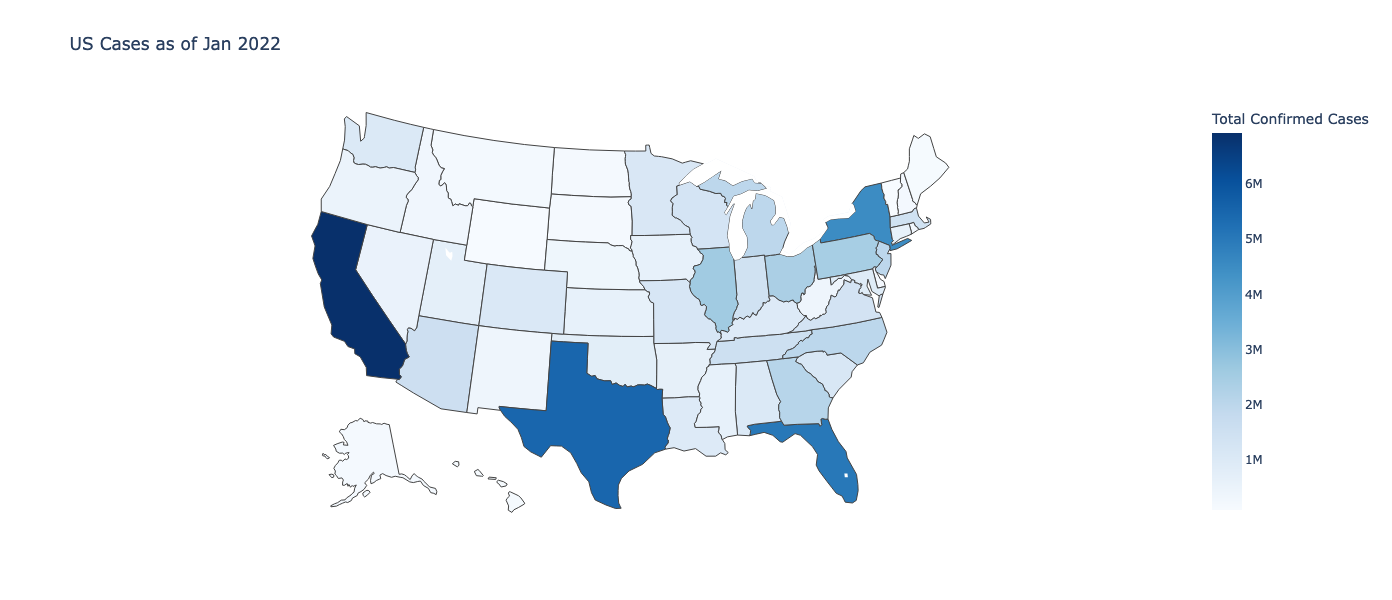

In [15]:
#Create chloropleth map of total cases by state
fig = px.choropleth(total_cases,
                   locations='Code', 
                   color = 'Total Confirmed Cases',
                   color_continuous_scale='blues',
                   hover_name = total_cases['Province_State'],
                   locationmode='USA-states', 
                   title = 'US Cases as of Jan 2022',
                   scope='usa',
                   width=1500, height=600)
fig.show()

## Tracking Daily Numbers by Year

Next, we will divide the data by year and look at the overall trends for 2020 and 2021. The dataset only tracks overall case numbers, so we will have to write a function to calculate daily case numbers for each year. We will create a table for each year and visualize the daily case numbers. 

In [16]:
covid_states = covid_states.set_index('Province_State')
covid_states.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Province_State                                                                  
Alabama               0        0        0        0        0        0        0   
Alaska                0        0        0        0        0        0        0   
Arizona               0        0        0        0        1        1        1   
Arkansas              0        0        0        0        0        0        0   
California            0        0        0        0        2        2        2   

                1/29/20  1/30/20  1/31/20  ...   1/7/22   1/8/22   1/9/22  \
Province_State                             ...                              
Alabama               0        0        0  ...   957848   966180   978632   
Alaska                0        0        0  ...   165353   165353   165353   
Arizona               1        1        1  ...  1445129  1461633  1477483   
Arkansas              0        0        0  ...   604843   613014   613014   
California            2        2        3  ...  6024606  6060550  6256322   

                1/10/22  1/11/22  1/12/22  1/13/22  1/14/22  1/15/22  1/16/22  
Province_State                                                                 
Alabama          984882   993418  1004622  1004622  1004622  1004622  1056478  
Alaska           168618   168618   173139   173139   178618   178618   178618  
Arizona         1491420  1505580  1524363  1542936  1563193  1563193  1567192  
Arkansas         622069   629825   640799   653789   664194   675790   681176  
California      6383610  6527242  6632985  6720235  6836637  6871649  6924718  

[5 rows x 726 columns]

In [17]:
covid_2020 = covid_states.loc[:,'1/22/20':'12/31/20']
covid_2021 = covid_states.loc[:,'12/31/20':'12/31/21']
covid_2020.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Province_State                                                                  
Alabama               0        0        0        0        0        0        0   
Alaska                0        0        0        0        0        0        0   
Arizona               0        0        0        0        1        1        1   
Arkansas              0        0        0        0        0        0        0   
California            0        0        0        0        2        2        2   

                1/29/20  1/30/20  1/31/20  ...  12/22/20  12/23/20  12/24/20  \
Province_State                             ...                                 
Alabama               0        0        0  ...    329811    334569    338801   
Alaska                0        0        0  ...     44485     44852     45122   
Arizona               1        1        1  ...    467215    473273    480319   
Arkansas              0        0        0  ...    205048    207941    211145   
California            2        2        3  ...   2036644   2077235   2121641   

                12/25/20  12/26/20  12/27/20  12/28/20  12/29/20  12/30/20  \
Province_State                                                               
Alabama           342426    343458    345628    347897    351804    356820   
Alaska             45122     45497     45800     45930     46123     46504   
Arizona           486935    493041    494337    504423    507222    512489   
Arkansas          213267    213969    214877    216528    219246    222430   
California       2148536   2200189   2233235   2270949   2307998   2328929   

                12/31/20  
Province_State            
Alabama           361226  
Alaska             47014  
Arizona           520207  
Arkansas          225138  
California       2386497  

[5 rows x 345 columns]

In [18]:
#write function that calculates daily numbers
states = covid_2020.index
all_numbers = []
for i in range(0,len(covid_2020.index)):
    daily_nums = [states[i]]
    for k in range(0,len(covid_2020.columns) - 1):
        daily_num = covid_2020.iloc[i,k+1] - covid_2020.iloc[i,k]
        daily_nums.append(daily_num)
    all_numbers.append(daily_nums)
    
#create dataframe for 2020 daily cases
numbers_2020 = pd.DataFrame(all_numbers, columns = covid_2020.columns)
numbers_2020 = numbers_2020.rename(columns={'1/22/20': 'Province_State'})
numbers_2020['Total'] = numbers_2020.sum(axis=1)
numbers_2020.loc['Total']= numbers_2020.sum()
numbers_2020.iloc[-1,0] = 'Total'
numbers_2020 = numbers_2020.set_index('Province_State')
numbers_2020.tail()


1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
Province_State                                                                  
Washington            0        0        0        0        0        0        0   
West Virginia         0        0        0        0        0        0        0   
Wisconsin             0        0        0        0        0        0        0   
Wyoming               0        0        0        0        0        0        0   
Total                 0        1        0        3        0        0        1   

                1/30/20  1/31/20  2/1/20  ...  12/23/20  12/24/20  12/25/20  \
Province_State                            ...                                 
Washington            0        0       0  ...      2315      2891         0   
West Virginia         0        0       0  ...      1199      1303      1597   
Wisconsin             0        0       0  ...      3063      3263      1639   
Wyoming               0        0       0  ...       285         0         0   
Total                 0        2       0  ...    225142    204543    108046   

                12/26/20  12/27/20  12/28/20  12/29/20  12/30/20  12/31/20  \
Province_State                                                               
Washington          3626         0      1953      2174      1484      4422   
West Virginia       1341       533       726      1337      1452      1109   
Wisconsin            677      2558      1557      2919      3170      4212   
Wyoming              482        54       504       219       210       276   
Total             217954    154198    166222    199504    222780    257691   

                   Total  
Province_State            
Washington        246751  
West Virginia      85334  
Wisconsin         520438  
Wyoming            44409  
Total           20077540  

[5 rows x 345 columns]

In [19]:
all_numbers = []
for i in range(0,len(covid_2021.index)):
    daily_nums = [states[i]]
    for k in range(0,len(covid_2021.columns) - 1):
        daily_num = covid_2021.iloc[i,k+1] - covid_2021.iloc[i,k]
        daily_nums.append(daily_num)
    all_numbers.append(daily_nums)
    


numbers_2021 = pd.DataFrame(all_numbers, columns = covid_2021.columns)
numbers_2021 = numbers_2021.rename(columns={'12/31/20': 'Province_State'})
numbers_2021['Total'] = numbers_2021.sum(axis=1)
numbers_2021.loc['Total']= numbers_2021.sum()
numbers_2021.iloc[-1,0] = 'Total'
numbers_2021 = numbers_2021.set_index('Province_State')
numbers_2021.tail()

1/1/21  1/2/21  1/3/21  1/4/21  1/5/21  1/6/21  1/7/21  \
Province_State                                                           
Washington           0       0    8644    1039    2332    1985    3260   
West Virginia     2486    1507    1731     828    1276    1516    1324   
Wisconsin         2085    1129    2593    1626    4019    4109    4509   
Wyoming              0     164     302     382     312     321     278   
Total           165472  294981  203401  180958  230674  256520  288275   

                1/8/21  1/9/21  1/10/21  ...  12/23/21  12/24/21  12/25/21  \
Province_State                           ...                                 
Washington        4595    2988        0  ...      4141         0         0   
West Virginia     1896    1880     1434  ...      1495         0         0   
Wisconsin         4110    3516     2126  ...      6221      4951         0   
Wyoming            479      72      113  ...       180         0         0   
Total           301255  258962   212880  ...    263493    219565     40113   

                12/26/21  12/27/21  12/28/21  12/29/21  12/30/21  12/31/21  \
Province_State                                                               
Washington             0     20494      3143      4818      6879         0   
West Virginia          0      3450      1053      1976      2648         0   
Wisconsin              0      5550      6899      7863      8901      8008   
Wyoming                0       382       293       325       396         0   
Total             176407    543136    354517    490528    577785    458716   

                   Total  
Province_State            
Washington        602323  
West Virginia     242828  
Wisconsin         600225  
Wyoming            71229  
Total           34368532  

[5 rows x 366 columns]

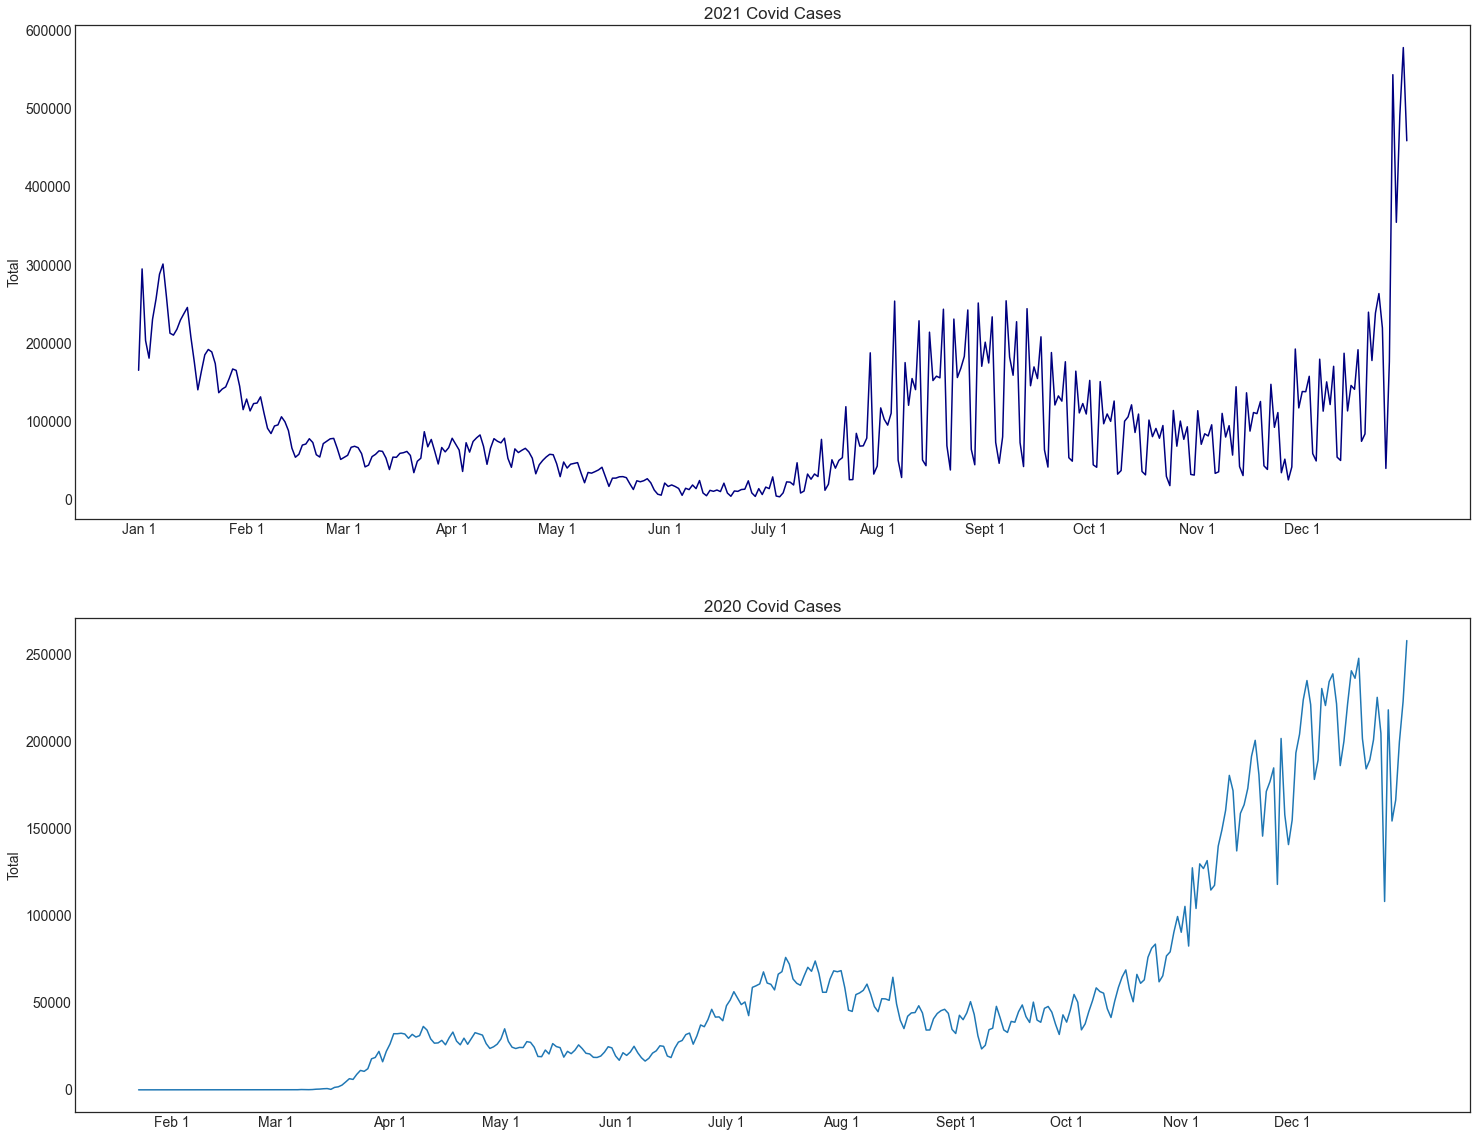

In [20]:
fig, ax = plt.subplots(2, figsize = (25,20))
ex = numbers_2021.transpose()
ex = ex.iloc[:-1,]
ey = numbers_2020.transpose()
ey = ey.iloc[:-1,]
sns.lineplot(data=ex, x = range(len(ex.index)), y = 'Total', ax = ax[0], color = 'navy')
sns.lineplot(data=ey, x = ey.index, y = 'Total', ax = ax[1])
ax[0].set_title('2021 Covid Cases')
ax[1].set_title('2020 Covid Cases')
ax[0].set_xticks([0,31,59,90, 120,151,181, 212, 243, 273, 304, 334])
ax[0].set_xticklabels(['Jan 1', 'Feb 1', 'Mar 1', 'Apr 1', 'May 1', 'Jun 1', 'July 1', 'Aug 1', 'Sept 1', 'Oct 1', 'Nov 1', 'Dec 1'])
ax[1].set_xticks([9, 37, 68, 98, 129, 159, 190, 221, 251, 282, 312])
ax[1].set_xticklabels(['Feb 1', 'Mar 1', 'Apr 1', 'May 1', 'Jun 1', 'July 1', 'Aug 1', 'Sept 1', 'Oct 1', 'Nov 1', 'Dec 1'])
plt.show()

Looking at the graphs together, we can see that they follow the same general trend. The cases start low at the beginning of the year and slowly trend upwards with increasingly larger waves. More specifically, it seems that increased waves of cases happen during the summer and the winter holidays, which makes sense given that people are more likely to be interacting during times like that. To look into this further, we will look at Covid cases by month comparing 2021 and 2020.

In [21]:
dates_2020 = ['1/23/20', '1/31/20','2/1/20','2/29/20', '3/1/20','3/31/20','4/1/20','4/30/20','5/1/20','5/31/20','6/1/20','6/30/20','7/1/20',
               '7/31/20','8/1/20','8/31/20','9/1/20','9/30/20','10/1/20','10/31/20','11/1/20','11/30/20','12/1/20','12/31/20']
dates_2021 = ['1/1/21', '1/31/21','2/1/21','2/28/21', '3/1/21','3/31/21','4/1/21','4/30/21','5/1/21','5/31/21','6/1/21','6/30/21','7/1/21',
               '7/31/21','8/1/21','8/31/21','9/1/21','9/30/21','10/1/21','10/31/21','11/1/21','11/30/21','12/1/21','12/31/21']
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
          'July','August','September','October','November','December']

monthly_numbers_2020 = []
for i in range(0,len(dates_2020)-1,2):
    monthly = numbers_2020.loc['Total', dates_2020[i]:dates_2020[i+1]].sum()
    monthly_numbers_2020.append(monthly)

monthly_numbers_2021 = []
for i in range(0,len(dates_2021)-1,2):
    monthly = numbers_2021.loc['Total', dates_2021[i]:dates_2021[i+1]].sum()
    monthly_numbers_2021.append(monthly)
    
monthly_cases = pd.DataFrame(
    {'Month': month_names,
     '2020 Cases': monthly_numbers_2020,
     '2021 Cases': monthly_numbers_2021
    })
monthly_cases

Month  2020 Cases  2021 Cases
0     January           7     6133873
1    February          18     2395340
2       March      191561     1806586
3       April      888068     1866388
4         May      717796      913748
5        June      842841      398431
6        July     1919181     1312388
7      August     1447856     4260831
8   September     1199103     4133684
9     October     1923349     2498071
10   November     4495839     2546345
11   December     6451921     6102847

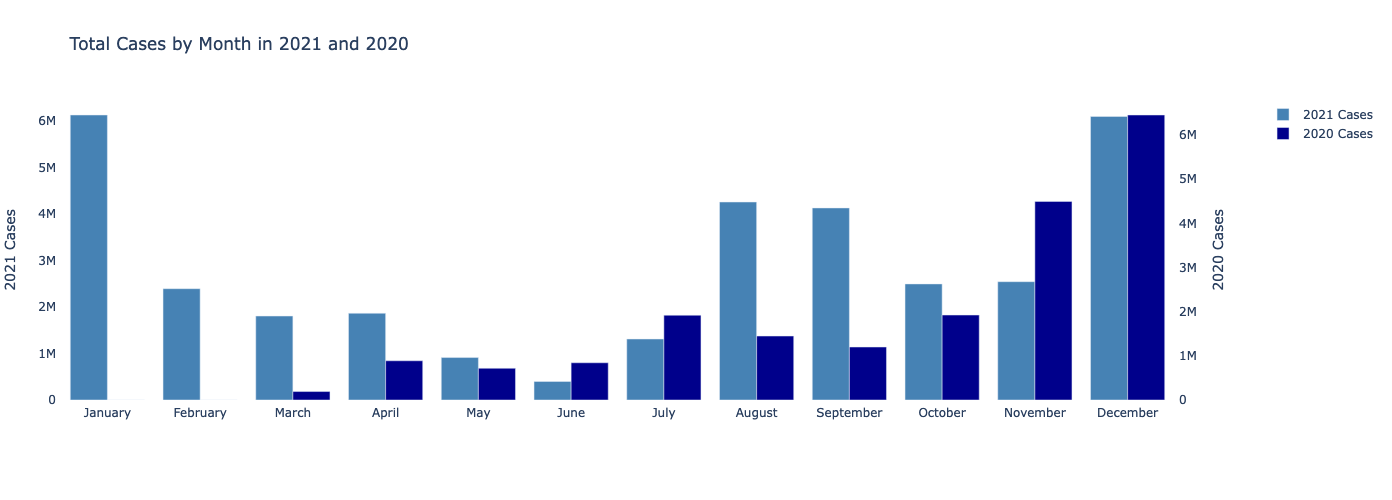

In [22]:
fig = go.Figure(
    data=[
        go.Bar(name='2021 Cases', x=monthly_cases['Month'], y=monthly_cases['2021 Cases'], yaxis='y', offsetgroup=1, marker_color='steelblue'),
        go.Bar(name='2020 Cases', x=monthly_cases['Month'], y = monthly_cases['2020 Cases'], yaxis='y2', offsetgroup=2, marker_color='darkblue')
    ],
    layout={
        'yaxis': {'title': '2021 Cases'},
        'yaxis2': {'title': '2020 Cases', 'overlaying': 'y', 'side': 'right'}
    }
)
fig.update_layout(barmode='group',
                  legend=dict(yanchor="top",y=1,xanchor="left",x=1.08))
fig.update_layout(
    title = 'Total Cases by Month in 2021 and 2020',
    autosize=False,
    width=1400,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="White",
    plot_bgcolor='White'
)
fig.show()

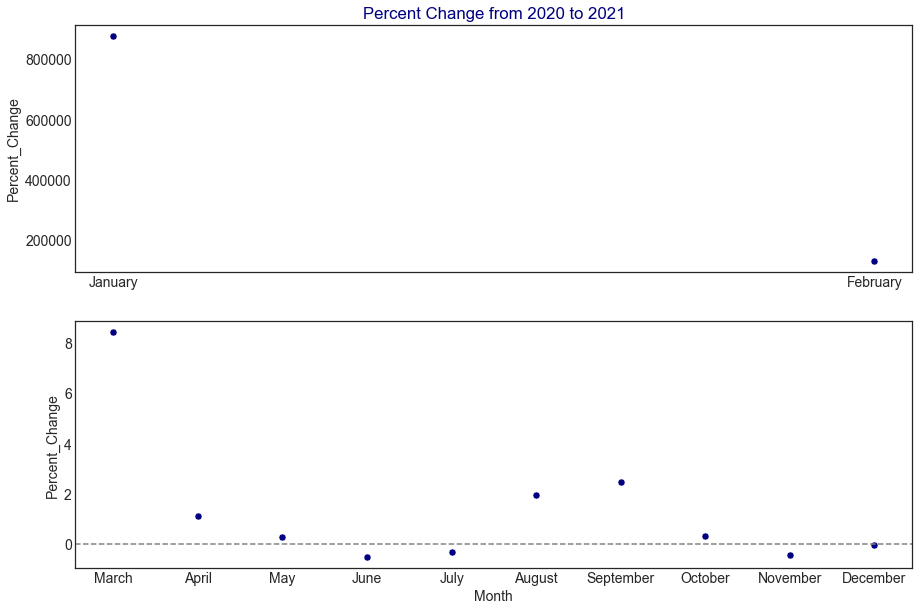

In [23]:
monthly_cases['Percent_Change'] = (monthly_cases['2021 Cases'] - monthly_cases['2020 Cases']) / monthly_cases['2020 Cases']
fig, ax = plt.subplots(2,1, figsize = (15,10))
sns.scatterplot(data=monthly_cases[2:], x='Month', y='Percent_Change', ax=ax[1], s = 50, color = 'navy')
sns.scatterplot(data=monthly_cases[0:2], x='Month', y='Percent_Change', ax=ax[0], s = 50, color = 'navy')
ax[0].set_title('Percent Change from 2020 to 2021', color = 'navy')
ax[1].axhline(y = 0, color = 'gray', linestyle = 'dashed')
ax[0].set_xlabel('')
plt.show()

## Looking at Holiday Patterns

While we could see where Covid cases tended to trend upwards, let us see if holidays actually cause spikes in cases. We will create a table with daily cases for the entire data range, then look at the 6 states with the most cases: California, Texas, Florida, New York, Illinois and Pennsylvania. We will specifically be looking at the daily cases around July 4th, and the grouping of Thanksgiving and Christmas. 

In [24]:
daily_numbers = covid_states.loc[:,'1/22/20':'1/16/22']
all_numbers = []
for i in range(0,len(daily_numbers.index)):
    daily_nums = [states[i]]
    for k in range(0,len(daily_numbers.columns) - 1):
        daily_num = daily_numbers.iloc[i,k+1] - daily_numbers.iloc[i,k]
        daily_nums.append(daily_num)
    all_numbers.append(daily_nums)
    


all_numbers = pd.DataFrame(all_numbers, columns = daily_numbers.columns)
all_numbers = all_numbers.rename(columns={'1/22/20': 'Province_State'})
all_numbers = all_numbers.set_index('Province_State')
all_numbers.head() 

1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
Province_State                                                                  
Alabama               0        0        0        0        0        0        0   
Alaska                0        0        0        0        0        0        0   
Arizona               0        0        0        1        0        0        0   
Arkansas              0        0        0        0        0        0        0   
California            0        0        0        2        0        0        0   

                1/30/20  1/31/20  2/1/20  ...  1/7/22  1/8/22  1/9/22  \
Province_State                            ...                           
Alabama               0        0       0  ...   12972    8332   12452   
Alaska                0        0       0  ...    3675       0       0   
Arizona               0        0       0  ...   14888   16504   15850   
Arkansas              0        0       0  ...    8434    8171       0   
California            0        1       0  ...   60917   35944  195772   

                1/10/22  1/11/22  1/12/22  1/13/22  1/14/22  1/15/22  1/16/22  
Province_State                                                                 
Alabama            6250     8536    11204        0        0        0    51856  
Alaska             3265        0     4521        0     5479        0        0  
Arizona           13937    14160    18783    18573    20257        0     3999  
Arkansas           9055     7756    10974    12990    10405    11596     5386  
California       127288   143632   105743    87250   116402    35012    53069  

[5 rows x 725 columns]

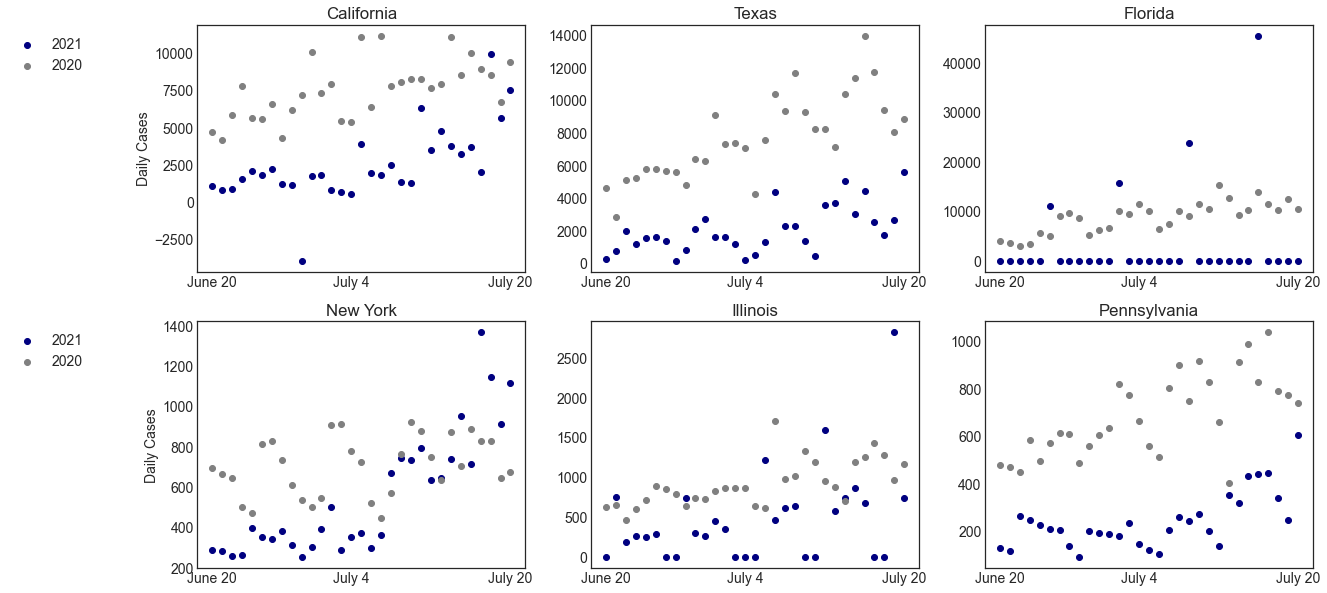

In [25]:
#make scatterplots for July 4
top_6 = ['California', 'Texas', 'Florida', 'New York', 'Illinois', 'Pennsylvania']
july4_2020 = all_numbers.loc[:,'6/20/20':'7/20/20'].transpose()
july4_2021 = all_numbers.loc[:,'6/20/21':'7/20/21'].transpose()

fig = plt.figure(figsize=(20,10))

for i in range(0,6):
    top_6 = ['California', 'Texas', 'Florida', 'New York', 'Illinois', 'Pennsylvania']

    ax = fig.add_subplot(2,3,i+1)
    g1 = ax.scatter(range(len(july4_2021.index)), july4_2021[top_6[i]], color='navy')
    g2 = ax.scatter(range(len(july4_2021.index)), july4_2020[top_6[i]], color='gray')
    ax.set_xticks([0, 14, 30])
    ax.set_xticklabels(['June 20', 'July 4', 'July 20'])
    ax.set_title(top_6[i])
    if i == 0 or i == 3:
        ax.legend((g1,g2), ('2021', '2020'), bbox_to_anchor=(-.6, 1), loc='upper left')
        ax.set_ylabel('Daily Cases')

Looking at the graphs, we can see that the graphs trend slightly upwards after July 4th in all the states. We can especially see it in California and New York. It is interesting to see that Florida's numbers were misreported given the situation they had with Governor DeSantis manipulating Covid-19 numbers. 

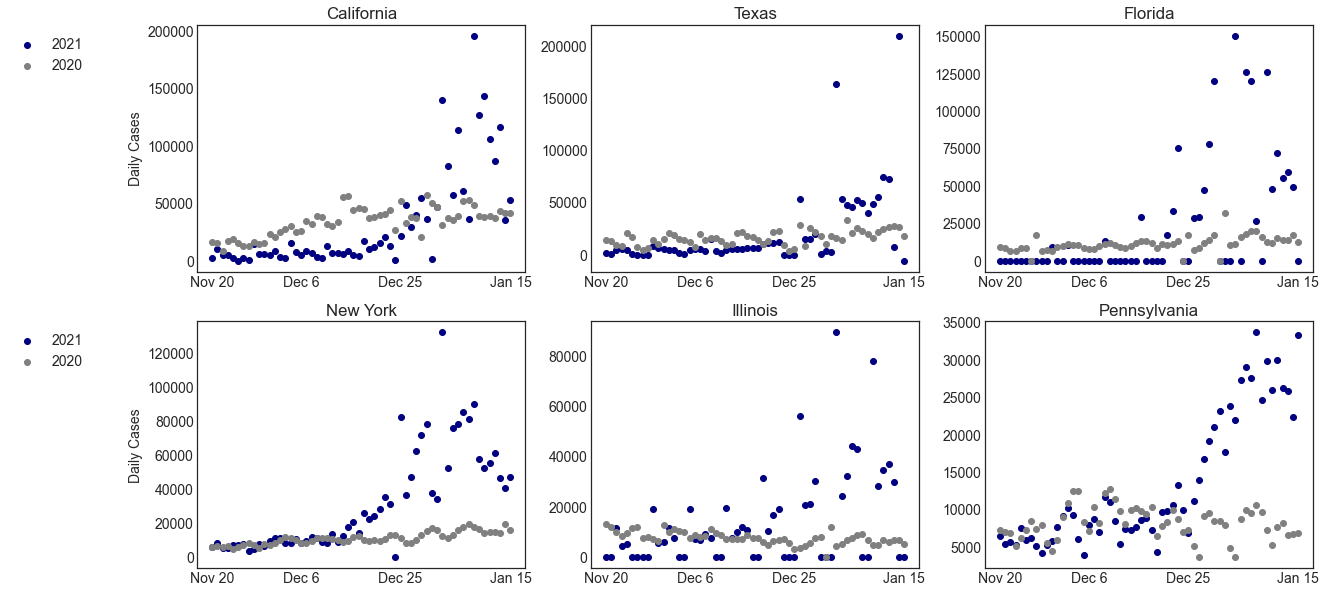

In [26]:
#make scatterplots for winter holidays
top_6 = ['California', 'Texas', 'Florida', 'New York', 'Illinois', 'Pennsylvania']
christmas_2020 = all_numbers.loc[:,'11/20/20':'1/16/21'].transpose()
christmas_2021 = all_numbers.loc[:,'11/20/21':'1/16/22'].transpose()

fig = plt.figure(figsize=(20,10))

for i in range(0,6):
    top_6 = ['California', 'Texas', 'Florida', 'New York', 'Illinois', 'Pennsylvania']

    ax = fig.add_subplot(2,3,i+1)
    g1 = ax.scatter(range(len(christmas_2021.index)), christmas_2021[top_6[i]], color = 'navy')
    g2 = ax.scatter(range(len(christmas_2020.index)), christmas_2020[top_6[i]], color='gray')
    ax.set_xticks([0,17, 36, 57])
    ax.set_xticklabels(['Nov 20', 'Dec 6','Dec 25','Jan 15' ])
    ax.set_title(top_6[i])
    if i == 0 or i == 3:
        ax.legend((g1,g2), ('2021', '2020'), bbox_to_anchor=(-.6, 1), loc='upper left')
        ax.set_ylabel('Daily Cases')

Looking at the two weeks after Thanksgiving, we can see that in states like New York and Illinois, there was not much variation. However, there is a spike around December 6th in California, and a blatant wave in Pennsylvania. We can really see the effects of the Holidays looking at the two weeks after Christmas, where ever state had a spike in cases. Given the situation with Covid, it makes sense that not as many people may have traveled home for Thanksgiving. But given that Christmas and New Years is the busiest travel holiday of the year, we can see that there were enormous spikes in cases in each of the 6 states following the winter holidays. 

## Breaking it down by Region

Another way we could look at the data is by the region of each state. We will write a function to assign a region to each state, then look at the case numbers for each region in 2021 and 2020. We will also look at overall case numbers by region. We will begin by assigning a region and aggregating the data.

In [27]:
#assign a region to each state
def get_region(state):
    northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts',
                 'Rhode Island', 'Connecticut', 'New York','New Jersey', 'Pennsylvania', 'District of Columbia']
    midwest = ['Ohio', 'Michigan', 'Indiana', 'Wisconsin', 'Illinois', 'Minnesota',
               'Iowa', 'Missouri' ,'North Dakota', 'South Dakota', 'Nebraska', 'Kansas']
    south = ['Delaware', 'Maryland', 'Virginia', 'West Virginia', 'Kentucky' ,'North Carolina', 'South Carolina',
             'Tennessee' ,'Georgia', 'Florida', 'Alabama' ,'Mississippi' ,'Arkansas', 'Louisiana' ,'Texas', 'Oklahoma']
    west = ['Montana', 'Idaho', 'Wyoming' ,'Colorado' ,'New Mexico', 'Arizona' ,
            'Utah', 'Nevada', 'California', 'Oregon', 'Washington', 'Alaska', 'Hawaii']
    region = ''
    
    if state in northeast:
        region = 'Northeast'
    elif state in midwest:
        region = 'Midwest'
    elif state in south:
        region = 'South'
    elif state in west:
        region = 'West'
    return region 

In [28]:
#create table for each year
num_index = pd.Series(covid_2021.index)
regions = list(num_index.apply(get_region))
regions.append('n/a')
numbers_2021.insert(loc= 0, column='Region', value = regions)
numbers_2020.insert(loc= 0, column='Region', value = regions)
region_2020 = numbers_2020.iloc[:-1,:-1].groupby('Region').sum()
region_2021 = numbers_2021.iloc[:-1,:-1].groupby('Region').sum()

region_2020
region_2021

1/1/21  1/2/21  1/3/21  1/4/21  1/5/21  1/6/21  1/7/21  1/8/21  \
Region                                                                      
Midwest     19993   50358   25192   33774   34561   46809   47313   49243   
Northeast   33566   44877   26281   31939   38956   44433   47540   50741   
South       44542  129411   84152   62792   99251  103610  111517  115959   
West        67371   70335   67776   52453   57906   61668   81905   85312   

           1/9/21  1/10/21  ...  12/22/21  12/23/21  12/24/21  12/25/21  \
Region                      ...                                           
Midwest     37131    24610  ...     72038     53223     20063       167   
Northeast   43704    36254  ...     68707     83776     75605     29337   
South      101959    91573  ...     67143     87313    100094      5027   
West        76168    60443  ...     30642     39181     23803      5582   

           12/26/21  12/27/21  12/28/21  12/29/21  12/30/21  12/31/21  
Region                                                                 
Midwest       23224    148792     70420    114010     92564     29919  
Northeast    103348    101147    103372    137604    166511    156681  
South         27584    186527    131561    171291    227696    209351  
West          22251    106670     49164     67623     91014     62765  

[4 rows x 365 columns]

In [29]:
#Create monthly numbers table for 2021
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
          'July','August','September','October','November','December']
regions = ['Midwest', 'Northeast', 'South', 'West']
midwest_2021 = []
northeast_2021= []
south_2021 = []
west_2021 = []
tables = [midwest_2021, northeast_2021, south_2021, west_2021]

for k in range(0,4):
    for i in range(0,len(dates_2021)-1,2):
        region = region_2021.iloc[[k]]
        monthly = int(region.loc[:, dates_2021[i]:dates_2021[i+1]].sum(axis = 1))
        ex = [month_names[int(i/2)], regions[k], monthly]
        tables[k].append(ex)
    

midwest_2021 = pd.DataFrame(midwest_2021)
northeast_2021 = pd.DataFrame(northeast_2021)
south_2021 = pd.DataFrame(south_2021)
west_2021 = pd.DataFrame(west_2021)

region_final_2021 = pd.concat([midwest_2021, northeast_2021, south_2021, west_2021])
region_final_2021.head()

0        1       2
0   January  Midwest  892811
1  February  Midwest  333239
2     March  Midwest  345985
3     April  Midwest  499774
4       May  Midwest  228747

In [30]:
#create monthly numbers table for 2020
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
          'July','August','September','October','November','December']
regions = ['Midwest', 'Northeast', 'South', 'West']
midwest_2020 = []
northeast_2020= []
south_2020 = []
west_2020 = []
tables = [midwest_2020, northeast_2020, south_2020, west_2020]

for k in range(0,4):
    for i in range(0,len(dates_2020)-1,2):
        region = region_2020.iloc[[k]]
        monthly = int(region.loc[:, dates_2020[i]:dates_2020[i+1]].sum(axis = 1))
        ex = [month_names[int(i/2)], regions[k], monthly]
        tables[k].append(ex)
    

midwest_2020 = pd.DataFrame(midwest_2020)
northeast_2020 = pd.DataFrame(northeast_2020)
south_2020 = pd.DataFrame(south_2020)
west_2020 = pd.DataFrame(west_2020)

region_final_2020 = pd.concat([midwest_2020, northeast_2020, south_2020, west_2020])
region_final_2020.head()

0        1       2
0   January  Midwest       2
1  February  Midwest       0
2     March  Midwest   23348
3     April  Midwest  148344
4       May  Midwest  189100

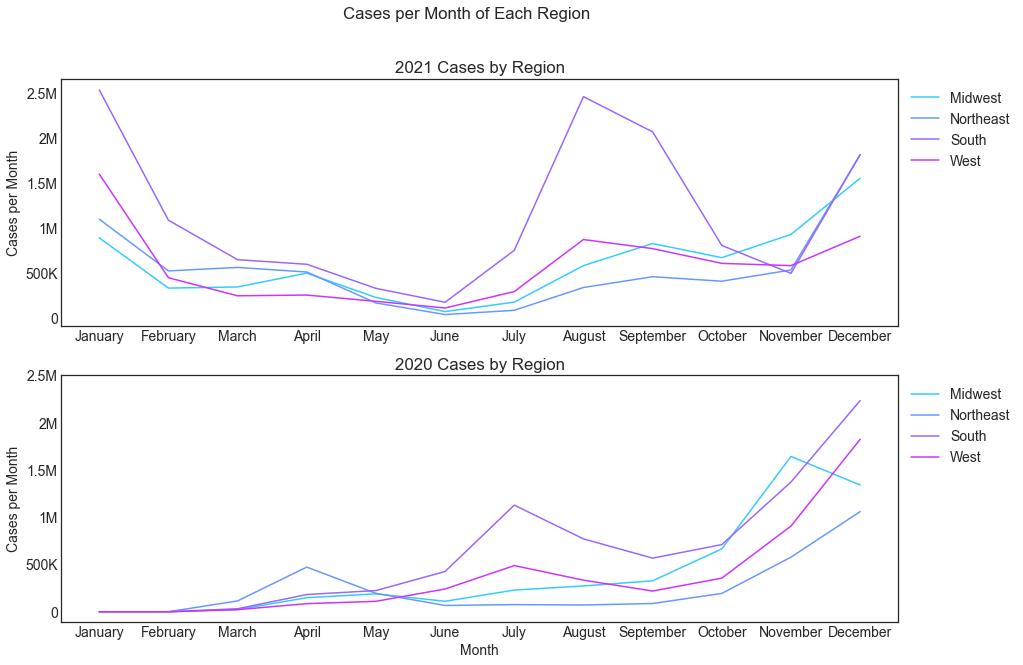

In [31]:
#create lineplots of cases per month of each region
fig, ax = plt.subplots(2,1, figsize = (15,10))
sns.lineplot(data=region_final_2021, x=0, y=2, hue=1, ax=ax[0], palette='cool')
sns.lineplot(data=region_final_2020, x=0, y=2, hue=1, ax=ax[1], palette='cool')
tickposition = [0,500000,1000000,1500000,2000000, 2500000]
ticklabels = ['0', '500K', '1M', '1.5M', '2M', '2.5M']
ax[0].set_yticks(tickposition)
ax[0].set_yticklabels(ticklabels)
ax[0].set_xlabel('')
ax[0].set_title('2021 Cases by Region')
ax[0].set_ylabel('Cases per Month')
ax[0].legend(bbox_to_anchor=(1, 1), loc='upper left')
ax[1].set_yticks(tickposition)
ax[1].set_yticklabels(ticklabels)
ax[1].set_ylabel('Cases per Month')
ax[1].set_xlabel('Month')
ax[1].set_title('2020 Cases by Region')
ax[1].legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.suptitle('Cases per Month of Each Region')
plt.show()

Looking at the 4 regions together, we can see that they all generally followed the same trend, with increasing waves of cases with the most at the end of the year. It seems like in both years, the south had steeper spikes, whereas the northeast seemed to be the most consistent. Interestingly, all regions seemed to end both years at around the same case numbers. 

In [32]:
#create sum column for each region
region_2020['Total'] = region_2020.sum(axis=1)
region_2021['Total'] = region_2021.sum(axis=1)
region_2020.tail()

1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
Region                                                                     
Midwest          0        1        0        0        0        0        0   
Northeast        0        0        0        0        0        0        1   
South            0        0        0        0        0        0        0   
West             0        0        0        3        0        0        0   

           1/30/20  1/31/20  2/1/20  ...  12/23/20  12/24/20  12/25/20  \
Region                               ...                                 
Midwest          0        1       0  ...     40164     33934     16391   
Northeast        0        0       0  ...     35021     37265     26603   
South            0        0       0  ...     87627     65972     25388   
West             0        1       0  ...     62330     67372     39664   

           12/26/20  12/27/20  12/28/20  12/29/20  12/30/20  12/31/20    Total  
Region                                                                          
Midwest       32260     19993     28673     33237     44763     39743  4945752  
Northeast     31549     20660     33062     31338     39393     40890  2910697  
South         82154     71799     47345     82332     98118     91464  7639361  
West          71991     41746     57142     52597     40506     85594  4581730  

[4 rows x 345 columns]

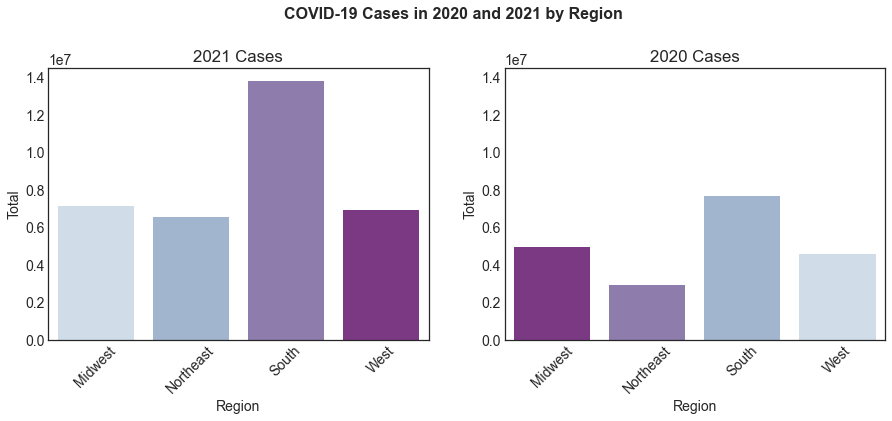

In [33]:
#create bar charts for total cases in each region
fig, axes = plt.subplots(1,2, figsize = (15,5), sharey=True)
fig.suptitle('COVID-19 Cases in 2020 and 2021 by Region', 
          fontsize = 16,
             fontweight = 'bold', 
            y = 1.05)

#graph 1
sns.barplot(x=region_2021.index, y='Total', data=region_2021, ax=axes[0], palette='BuPu')
axes[0].set_title('2021 Cases')
axes[0].tick_params(axis='x', rotation=45)
#graph 2
sns.barplot(x=region_2020.index, y='Total', data=region_2020, ax=axes[1], palette='BuPu_r')
axes[1].set_title('2020 Cases')
axes[1].tick_params(axis='x', rotation=45)
axes[1].yaxis.set_tick_params(labelbottom=True)

## Vaccinations and Case Rates

Vaccine recommendations have been pushed out nationwide to help curb Covid-19 cases. This has been met with criticism and backlash as people are still unsure as to whether or not the vaccine has had any effect on stopping Covid. Do states with higher vaccination rates have lower cases? We will be using a dataset from the CDC that contains vaccination rates for US counties (https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-County/8xkx-amqh). We will read in the dataset and combine it with our total cases table. Then we will check if state vaccination proportion has any correlation with our numbers.

In [34]:
vaccinations = pd.read_csv('COVID-19_Vaccinations.csv')
vaccinations.head()

Date  MMWR_week Location  Distributed  Distributed_Janssen  \
0  01/25/2022          4       CO     11426955               482600   
1  01/25/2022          4       GA     19734215               806700   
2  01/25/2022          4       DC      1702685                69100   
3  01/25/2022          4       NM      4076715               185500   
4  01/25/2022          4       IA      6009475               283500   

   Distributed_Moderna  Distributed_Pfizer  Distributed_Unk_Manuf  \
0              4209500             6734855                      0   
1              7575160            11352355                      0   
2               601860             1031725                      0   
3              1588940             2302275                      0   
4              2271140             3454835                      0   

   Dist_Per_100K  Distributed_Per_100k_12Plus  ...  \
0         198428                       231499  ...   
1         185866                       219559  ...   
2         241259                       279241  ...   
3         194423                       228077  ...   
4         190470                       224546  ...   

   Administered_Dose1_Recip_5PlusPop_Pct  Series_Complete_5Plus  \
0                                   81.8              3912959.0   
1                                   67.6              5588867.0   
2                                   95.0               491663.0   
3                                   89.2              1426781.0   
4                                   70.8              1897842.0   

   Series_Complete_5PlusPop_Pct  Administered_5Plus  Admin_Per_100k_5Plus  \
0                          72.1           9978644.0              183886.0   
1                          56.1          13942036.0              139968.0   
2                          74.5           1358543.0              205721.0   
3                          72.2           3621979.0              183313.0   
4                          64.1           4808116.0              162467.0   

   Distributed_Per_100k_5Plus  Series_Complete_Moderna_5Plus  \
0                    210576.0                      1405849.0   
1                    198118.0                      2104040.0   
2                    257834.0                       170576.0   
3                    206328.0                       546378.0   
4                    203062.0                       702302.0   

   Series_Complete_Pfizer_5Plus  Series_Complete_Janssen_5Plus  \
0                     2198699.0                       306058.0   
1                     3162622.0                       311432.0   
2                      282410.0                        38310.0   
3                      771290.0                       107054.0   
4                     1034999.0                       160244.0   

   Series_Complete_Unk_Manuf_5Plus  
0                           2353.0  
1                          10773.0  
2                            367.0  
3                           2059.0  
4                            297.0  

[5 rows x 80 columns]

In [35]:
cols = ['Date','Location','Series_Complete_Pop_Pct']
vac = vaccinations[cols]
vac = vac[vac['Date'] == '01/16/2022']
vac.head()

Date Location  Series_Complete_Pop_Pct
576  01/16/2022      BP2                      0.0
577  01/16/2022       CA                     67.4
578  01/16/2022       OH                     56.1
579  01/16/2022       SC                     53.9
580  01/16/2022       NM                     67.2

In [36]:
#combine vaccination rate table with total cases table
total_cases = total_cases.merge(vac[['Location','Series_Complete_Pop_Pct']],how='left', left_on='Code', right_on='Location')
total_cases = total_cases.rename(columns={'Series_Complete_Pop_Pct':'Proportion Vaccinated'})
total_cases = total_cases.drop(columns=['Location'])
total_cases.head()

Province_State  Total Confirmed Cases  Cases Ranking  Population  \
0   Rhode Island                 302109             40     1059361   
1   North Dakota                 195545             45      762062   
2         Alaska                 178618             46      731545   
3        Florida                5041918              3    21477737   
4           Utah                 750334             28     3205958   

   Proportion Infected  Proportion Ranking Code  Proportion Vaccinated  
0             0.285180                   1   RI                   77.9  
1             0.256600                   2   ND                   53.3  
2             0.244165                   3   AK                   57.0  
3             0.234751                   4   FL                   64.1  
4             0.234044                   5   UT                   59.7

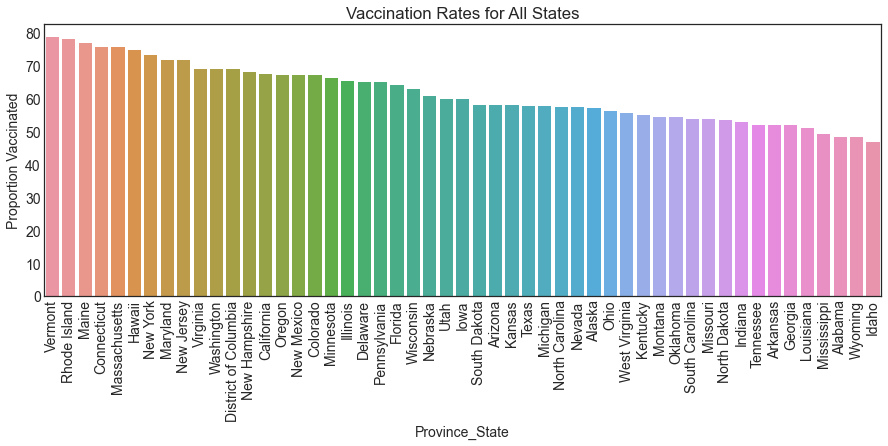

In [37]:
sns.barplot(data=total_cases.sort_values('Proportion Vaccinated', ascending = False), x='Province_State',y='Proportion Vaccinated')
plt.title('Vaccination Rates for All States')
plt.xticks(rotation = 90) 
plt.show()

<AxesSubplot:xlabel='Proportion Infected', ylabel='Proportion Vaccinated'>

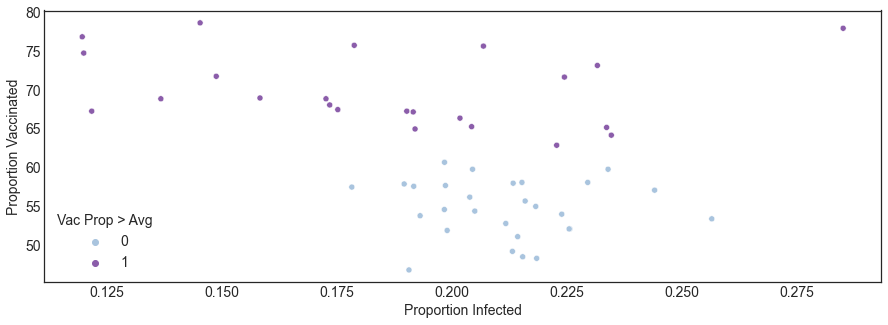

In [38]:
#make column if state vaccination proportion is greater than average of all states
total_cases['Vac Prop > Avg'] = [1 if x >= total_cases['Proportion Vaccinated'].mean() else 0 for x in total_cases['Proportion Vaccinated']]
sns.scatterplot(data=total_cases, x='Proportion Infected', y='Proportion Vaccinated', hue='Vac Prop > Avg', palette='BuPu')

In [39]:
total_cases.corr()[['Proportion Vaccinated']]

Proportion Vaccinated
Total Confirmed Cases               0.064918
Cases Ranking                       0.069850
Population                          0.086872
Proportion Infected                -0.400207
Proportion Ranking                  0.373680
Proportion Vaccinated               1.000000
Vac Prop > Avg                      0.877968

Looking at the scatterplot, we can see that there is a negative correlation between proportion infected and proportion vaccinated, meaning that places with a higher proportion infected tend to have a lower proportion of vaccinated people. Diving the points into those that have a vaccination proportion greater than the average, we can see that the majority of states who are higher than average have lower proportion infected values. 

We can see that there is an outlier in the upper left corner, which happens to be Rhode Island. Rhode Island actually has the 2nd highest proportion vaccinated, but as we saw earlier, has the highest proportion infected. Why could that be?

In [40]:
ri = df[df['Province_State'] == 'Rhode Island'][['Admin2','1/16/22']]
ri['Percent'] = ri['1/16/22'] / sum(ri['1/16/22']) * 100
ri

Admin2  1/16/22    Percent
2480     Bristol    10009   3.313043
2481        Kent    36275  12.007256
2482     Newport    14544   4.814156
2483   Out of RI        0   0.000000
2484  Providence   172007  56.935411
2485  Unassigned    46133  15.270316
2486  Washington    23141   7.659818

Looking at the cases by county in Rhode Island, we can see that Providence County makes up 57% of all cases in the state. From US Census data, we know that the population of Providence County is 638,931, meaning that nearly 2/3 of all people who live in Rhode Island live in the county. Doing further research, the US Census data also shows that Rhode Island is the 3rd most densely populated area in the country, only behind Washington D.C and New Jersey. It makes sense that with such a densely populated state, cases are spread more easily.


## 2020 Election Results and Covid-19

Given how Covid-19 response was a major talking point during the 2020 elections, it would be intriguing to see if there are any differences between states that voted Democratic or Republican in terms of case rates. We will be using a dataset of election results from Kaggle(https://www.kaggle.com/tunguz/us-elections-dataset) and manipulate the data to show which president won each state in 2020. We will then combine the results with our total cases table and see if there is any association between case rates and political party. 

In [41]:
elections = pd.read_csv('1976-2020-president.csv')
elections.head()

year    state state_po  state_fips  state_cen  state_ic        office  \
0  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
1  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
2  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
3  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
4  1976  ALABAMA       AL           1         63        41  US PRESIDENT   

                 candidate              party_detailed writein  \
0            CARTER, JIMMY                    DEMOCRAT   False   
1             FORD, GERALD                  REPUBLICAN   False   
2           MADDOX, LESTER  AMERICAN INDEPENDENT PARTY   False   
3  BUBAR, BENJAMIN ""BEN""                 PROHIBITION   False   
4                HALL, GUS         COMMUNIST PARTY USE   False   

   candidatevotes  totalvotes   version  notes party_simplified  
0          659170     1182850  20210113    NaN         DEMOCRAT  
1          504070     1182850  20210113    NaN       REPUBLICAN  
2            9198     1182850  20210113    NaN            OTHER  
3            6669     1182850  20210113    NaN            OTHER  
4            1954     1182850  20210113    NaN            OTHER

In [42]:
election_2020 = elections[(elections['year'] == 2020) & (elections['party_detailed'].isin(['REPUBLICAN','DEMOCRAT']))]
election_2020.tail()

year          state state_po  state_fips  state_cen  state_ic  \
4264  2020  WEST VIRGINIA       WV          54         55        56   
4267  2020      WISCONSIN       WI          55         35        25   
4268  2020      WISCONSIN       WI          55         35        25   
4280  2020        WYOMING       WY          56         83        68   
4281  2020        WYOMING       WY          56         83        68   

            office            candidate party_detailed writein  \
4264  US PRESIDENT     TRUMP, DONALD J.     REPUBLICAN   False   
4267  US PRESIDENT  BIDEN, JOSEPH R. JR       DEMOCRAT   False   
4268  US PRESIDENT     TRUMP, DONALD J.     REPUBLICAN   False   
4280  US PRESIDENT  BIDEN, JOSEPH R. JR       DEMOCRAT   False   
4281  US PRESIDENT     TRUMP, DONALD J.     REPUBLICAN   False   

      candidatevotes  totalvotes   version  notes party_simplified  
4264          545382      794652  20210113    NaN       REPUBLICAN  
4267         1630866     3298041  20210113    NaN         DEMOCRAT  
4268         1610184     3298041  20210113    NaN       REPUBLICAN  
4280           73491      278503  20210113    NaN         DEMOCRAT  
4281          193559      278503  20210113    NaN       REPUBLICAN

In [43]:
#write a function to indicate whether the 2020 winner was Biden or Trump, then include political party
election = election_2020
results = []
for s in election['state_po'].unique():
    result = []
    votes = election[election['state_po'] == s]['candidatevotes']
    if votes.iloc[0] > votes.iloc[1]:
        ans = list([s,'Democratic'])
        results.append(ans) 
    else:
        ans = [s,'Republican']
        results.append(ans)
results = pd.DataFrame(results, columns = ['Code','2020_Party'])
results.head()     

Code  2020_Party
0   AL  Republican
1   AK  Republican
2   AZ  Democratic
3   AR  Republican
4   CA  Democratic

In [44]:
total_cases = total_cases.merge(results,how='left', left_on='Code', right_on='Code')
total_cases.head()

Province_State  Total Confirmed Cases  Cases Ranking  Population  \
0   Rhode Island                 302109             40     1059361   
1   North Dakota                 195545             45      762062   
2         Alaska                 178618             46      731545   
3        Florida                5041918              3    21477737   
4           Utah                 750334             28     3205958   

   Proportion Infected  Proportion Ranking Code  Proportion Vaccinated  \
0             0.285180                   1   RI                   77.9   
1             0.256600                   2   ND                   53.3   
2             0.244165                   3   AK                   57.0   
3             0.234751                   4   FL                   64.1   
4             0.234044                   5   UT                   59.7   

   Vac Prop > Avg  2020_Party  
0               1  Democratic  
1               0  Democratic  
2               0  Republican  
3               1  Republican  
4               0  Republican

In [45]:
party = total_cases.groupby('2020_Party').sum()[['Total Confirmed Cases','Population']]
party['Proportion Infected'] = party['Total Confirmed Cases'] / party['Population']
party

Total Confirmed Cases  Population  Proportion Infected
2020_Party                                                        
Democratic               45839958   234361066             0.195595
Republican               19409721    93878457             0.206754

Looking at the proportion infected, we can see that there was not a major difference between Republican and Democratic states. While the number of cases are vastly different, the populations of the areas are quite different so that is not a measure that can be accurately used. We will see if there is any correlation with political party.

In [46]:
#make dummy variable for republican column
total_cases['Republican'] = [1 if x =='Republican' else 0 for x in total_cases['2020_Party']]
total_cases.corr()[['Republican']]

Republican
Total Confirmed Cases   -0.104595
Cases Ranking            0.078049
Population              -0.123690
Proportion Infected      0.073762
Proportion Ranking      -0.136586
Proportion Vaccinated   -0.263325
Vac Prop > Avg          -0.092159
Republican               1.000000

<AxesSubplot:xlabel='Proportion Infected', ylabel='Proportion Vaccinated'>

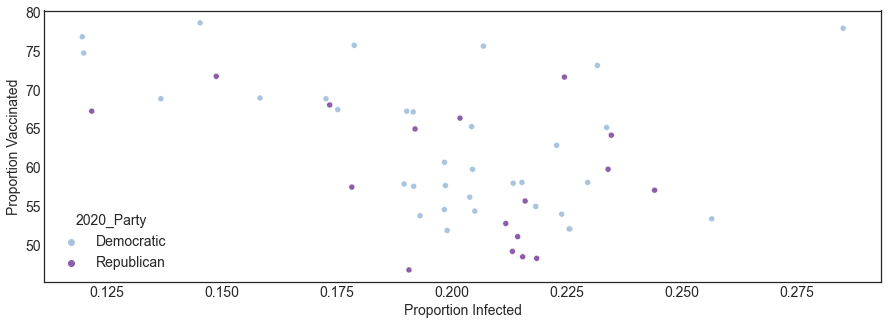

In [47]:
plt.style.use('seaborn-white')
sns.scatterplot(data=total_cases, x='Proportion Infected', y='Proportion Vaccinated', hue='2020_Party', palette='BuPu')

Looking at the correlation, we an see that the Proportion Infected column is very weakly positively correlated with whether or not the state voted Republican. However, the correlation is a very low value and does not indicate much about the relationship. Looking at proportion vaccinated, we can see that there was a negativel correlation between proportion vaccinated and political party, meaning that republican states tended to have lower proportion vaccinated. 

## Comparing Political Party and Deaths

While the focus of this project was on Covid-19 Cases, we will look at deaths to see if we can find any more insights on political party. We will read in a dataset of deaths that was also from the Johns Hopkins CSSE Github and prepare the data the same way. 

In [48]:
covid_deaths = pd.read_csv('covid_deaths.csv')
covid_deaths.head()

UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 1/18/22  1/19/22  1/20/22  1/21/22  1/22/22  \
0  32.539527 -86.644082  ...     163      163      163      163      163   
1  30.727750 -87.722071  ...     605      605      607      608      608   
2  31.868263 -85.387129  ...      83       83       83       83       83   
3  32.996421 -87.125115  ...      95       95       95       95       95   
4  33.982109 -86.567906  ...     203      203      204      204      204   

   1/23/22  1/24/22  1/25/22  1/26/22  1/27/22  
0      163      163      165      163      163  
1      608      608      610      608      608  
2       83       83       84       83       83  
3       95       95       95       95       95  
4      204      204      206      204      204  

[5 rows x 749 columns]

In [49]:
d_states = covid_deaths.groupby('Province_State').agg(np.sum)
d_states.reset_index(inplace = True)
d_states = d_states.drop([2,9,13,14,39,44,52]).drop('FIPS', axis = 1)
d_states.reset_index(drop = True, inplace = True)
total = d_states.loc[:,['Province_State','1/27/22']]
total = total.rename(columns={'1/27/22': 'Total Confirmed Deaths'})
total = total.sort_values(by='Total Confirmed Deaths', ascending = False)

#join to the total cases table
total_cases = total_cases.merge(total,how='left', left_on='Province_State', right_on='Province_State')
total_cases.head()

Province_State  Total Confirmed Cases  Cases Ranking  Population  \
0   Rhode Island                 302109             40     1059361   
1   North Dakota                 195545             45      762062   
2         Alaska                 178618             46      731545   
3        Florida                5041918              3    21477737   
4           Utah                 750334             28     3205958   

   Proportion Infected  Proportion Ranking Code  Proportion Vaccinated  \
0             0.285180                   1   RI                   77.9   
1             0.256600                   2   ND                   53.3   
2             0.244165                   3   AK                   57.0   
3             0.234751                   4   FL                   64.1   
4             0.234044                   5   UT                   59.7   

   Vac Prop > Avg  2020_Party  Republican  Total Confirmed Deaths  
0               1  Democratic           0                    3288  
1               0  Democratic           0                    2137  
2               0  Republican           1                    1081  
3               1  Republican           1                   64368  
4               0  Republican           1                    4097

In [50]:
total_cases.corr()[['Republican']]

Republican
Total Confirmed Cases    -0.104595
Cases Ranking             0.078049
Population               -0.123690
Proportion Infected       0.073762
Proportion Ranking       -0.136586
Proportion Vaccinated    -0.263325
Vac Prop > Avg           -0.092159
Republican                1.000000
Total Confirmed Deaths   -0.086692

In [51]:
party = total_cases.groupby('2020_Party').sum()[['Total Confirmed Deaths','Population']]
party['Proportion Deaths'] = party['Total Confirmed Deaths'] / party['Population']
party

Total Confirmed Deaths  Population  Proportion Deaths
2020_Party                                                       
Democratic                  605625   234361066           0.002584
Republican                  268618    93878457           0.002861

It seems that political party may have little to no association with how Covid-19 has affected them relative to proportion. We can see that there is a similar relationship between political party and proportion vaccinated, however there are no major differences in case and death rates between the two political parties. 

## Conclusion

Coming into this project, we were looking to answer questions about the raw numbers and trends of the Covid pandemic. 

First, we found that California and Vermont had the most and least cases, respectively. Looking at scaled statistics, we found that Rhode Island and Maine had the highest and lowest proportion infected, respectively. 

Covid-19 case trends appeared to be seasonal, with upward trends throughout both 2020 and 2021. Surprisingly, cases ended at similar amounts at the end of both 2020 and 2021 despite a year of experience. December and January tended to have the most cases, whereas monthly cases did not greatly increase or decrease betwene the years. 

Looking at the July 4th and winter holidays, major holidays also do seem to lead to large spikes in cases. With significantly increased travel and personal interactions, it only makes sense that we see spikes during these times. Going forward, it will likely be necessary to put in a plan to curb waves during these times. 

States with higher vaccination rates did tend to have a lower proportion infected, although outliers like Rhode Island are definitely real. It seems that population density plays a role in this, which makes sense given that Covid is easily transmissible in crowded communities. 

Political party does not seem to have a connection with Covid-19 case rates and death rates, but it does appear to have a relationship with vaccination rates. 

Thank you!